# Delhi Pollution all stations 2015 
#### Data from https://data.gov.in/resources/location-wise-daily-ambient-air-quality-delhi-year-2015/api



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import json 
import requests
import pandas as pd
import numpy as np

from datetime import datetime

In [2]:
import urllib.request, json 
import os

def get_records_for_2015():
    
    try:  
       os.environ["DATA_GOV_TOKEN"]
    except KeyError: 
       print("Please set the environment variable DATA_GOV_TOKEN")
       sys.exit(1)
    
    
    url = "https://api.data.gov.in/resource/c8a9ab7d-1704-4e4f-8599-9cc35e5f53ad?format=json&api-key={}&limit=745".format(os.environ["DATA_GOV_TOKEN"])
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode())
        return data["records"]
    

In [3]:
all_records = get_records_for_2015()
all_record_df = pd.DataFrame(all_records)


# Distinct locations

In [6]:
def plot_all_data(records, pollutant, diwali_date_string):
    df = pd.DataFrame(records)
    
    fig = plt.figure(figsize=(20,10))
    diwali_date = pd.to_datetime(diwali_date_string, format="%d-%m-%y")
    plt.axvline(x=diwali_date, ymin=0, linewidth=1, color="red")
    
    ax = fig.add_subplot(111)
    ax.set_ylabel(pollutant)
    ax.set_xlabel("Date")
    
    station_names_array = all_record_df['location_of_monitoring_station'].unique()
    
    for station in station_names_array:
        station_df = df[df['location_of_monitoring_station'] == station]
        pollutant_df = station_df[pollutant]
        pollutant_df = pollutant_df[pollutant_df != 'NA']
        pollutant_df = pd.DataFrame(pollutant_df, dtype='float')
        dates_df = pd.to_datetime(station_df.sampling_date[station_df[pollutant] != 'NA'], format="%d-%m-%y")
        plt.plot(dates_df, pollutant_df, '*-', linewidth=2)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


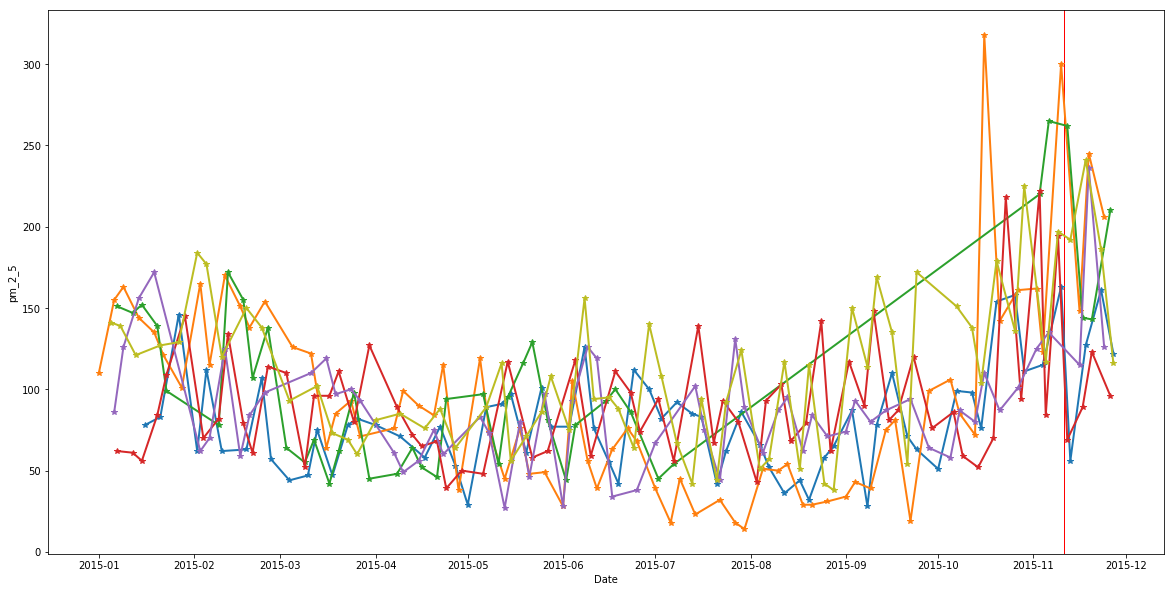

In [7]:
plot_all_data(all_record_df, 'pm_2_5', diwali_date_string='11-11-15')

In [8]:
def plot_all_data_different_plot(records, pollutant, diwali_date_string):
    station_names_array = all_record_df['location_of_monitoring_station'].unique()
    df = pd.DataFrame(records)
    for station in station_names_array:
        
        # Draw diwali date 
        fig = plt.figure(figsize=(20,10))
        diwali_date = pd.to_datetime(diwali_date_string, format="%d-%m-%y")
        plt.axvline(x=diwali_date, ymin=0, linewidth=1, color="red")

        # Draw x-label and y-label
        ax = fig.add_subplot(111)
        ax.set_ylabel(pollutant)
        ax.set_xlabel("Date in station {}".format(station))

        # dataframe for this particular station
        station_df = df[df['location_of_monitoring_station'] == station]
        pollutant_df = station_df[pollutant]
        pollutant_df = pollutant_df[pollutant_df != 'NA']
        dates_df = pd.to_datetime(station_df.sampling_date[station_df[pollutant] != 'NA'], format="%d-%m-%y")
        pollutant_df = pd.DataFrame(pollutant_df, dtype='float')
            
        plt.plot(dates_df, pollutant_df, '*-', linewidth=2)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


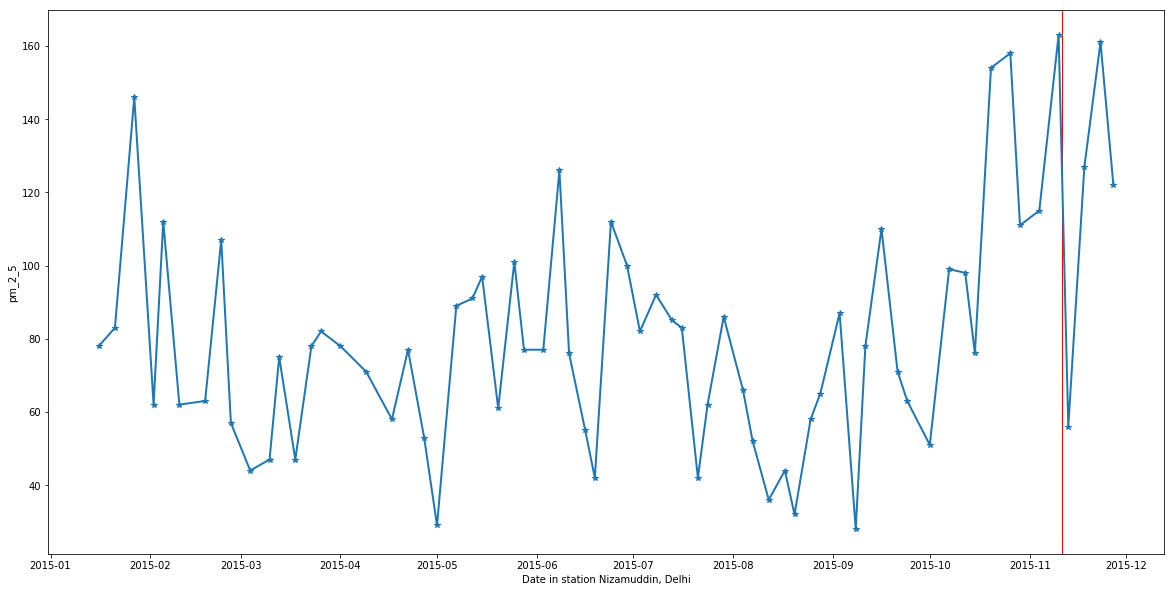

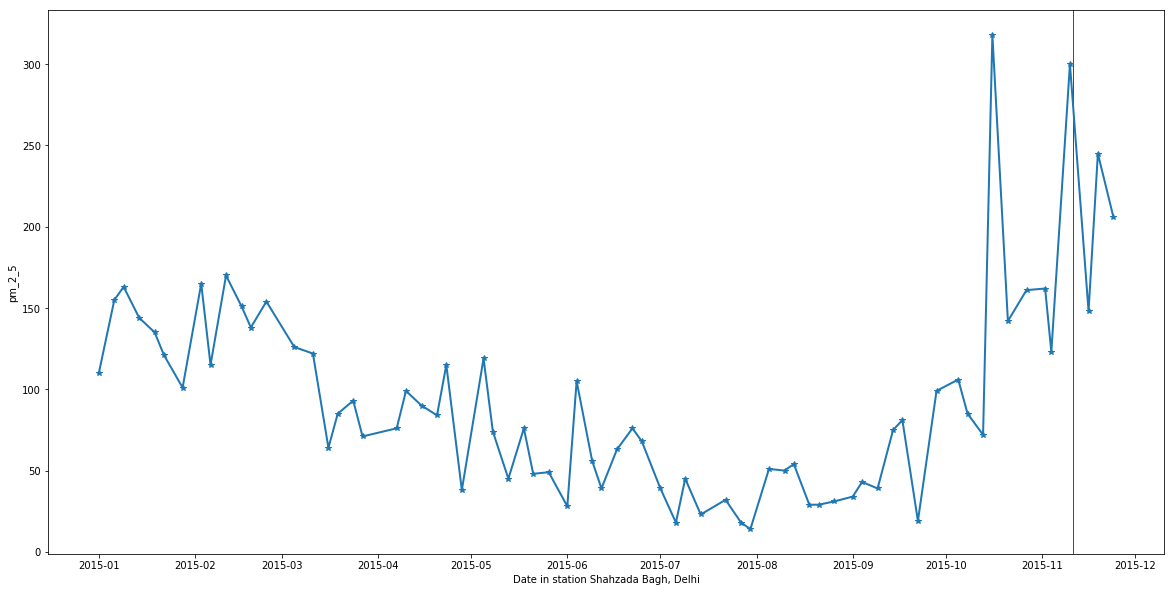

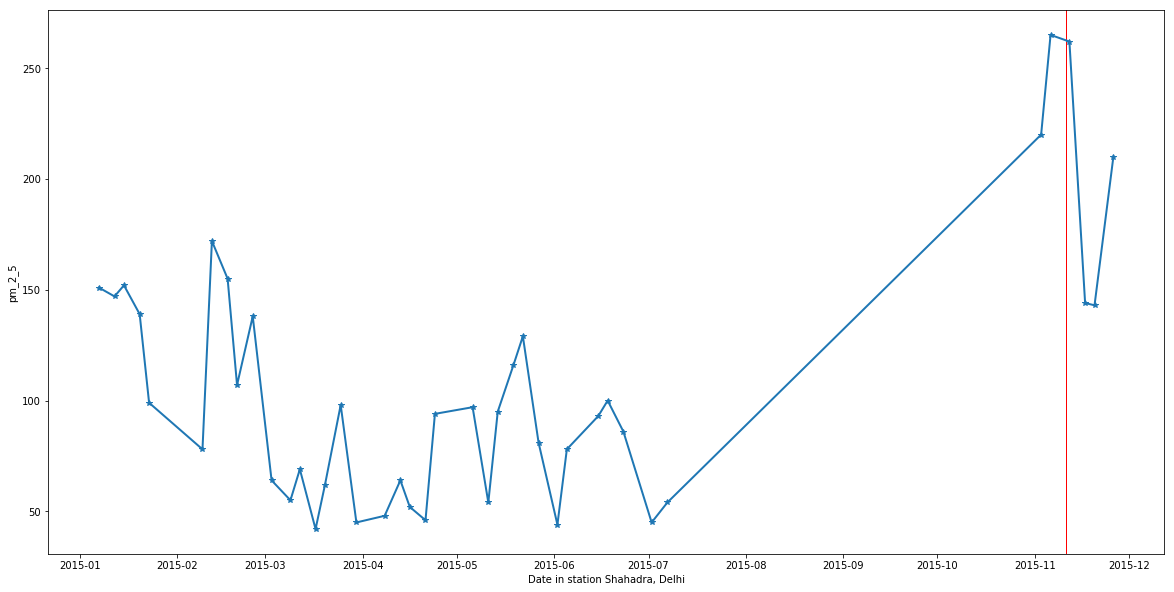

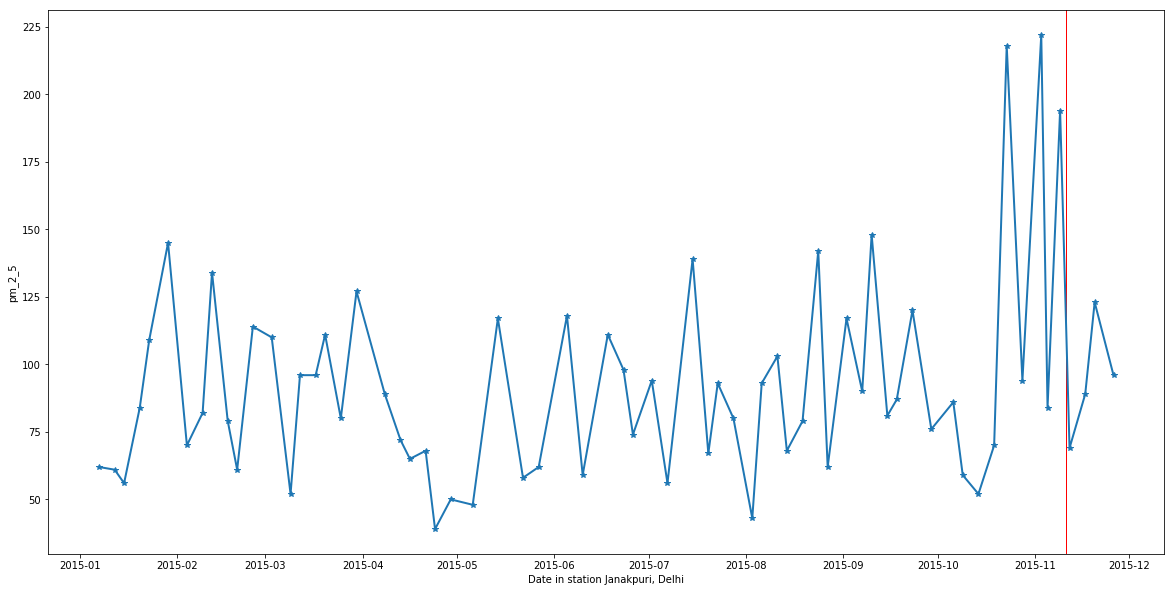

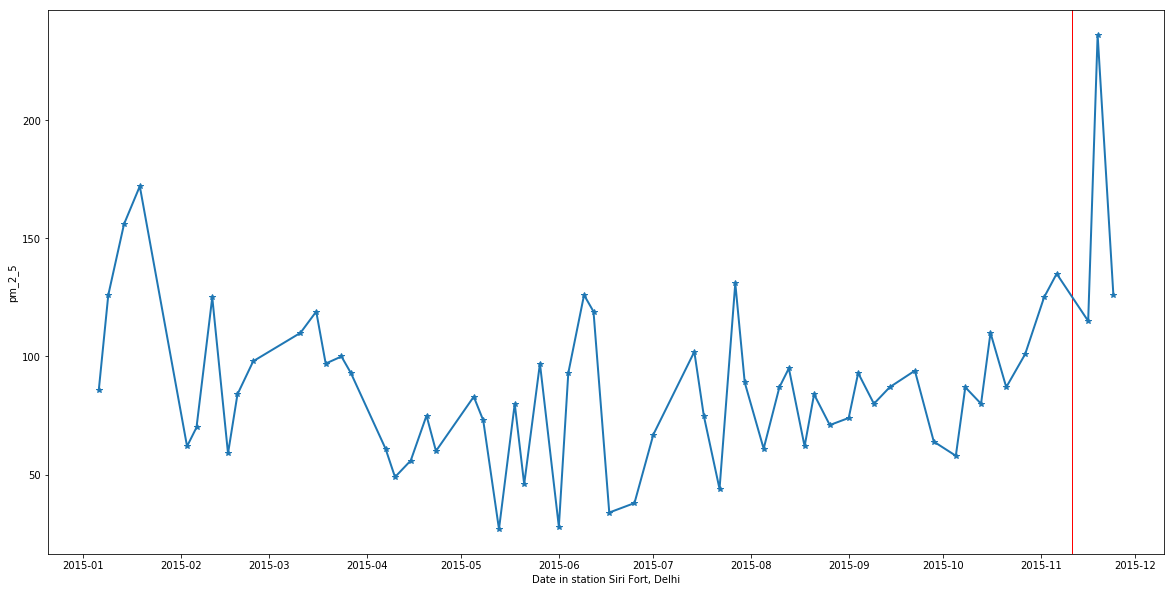

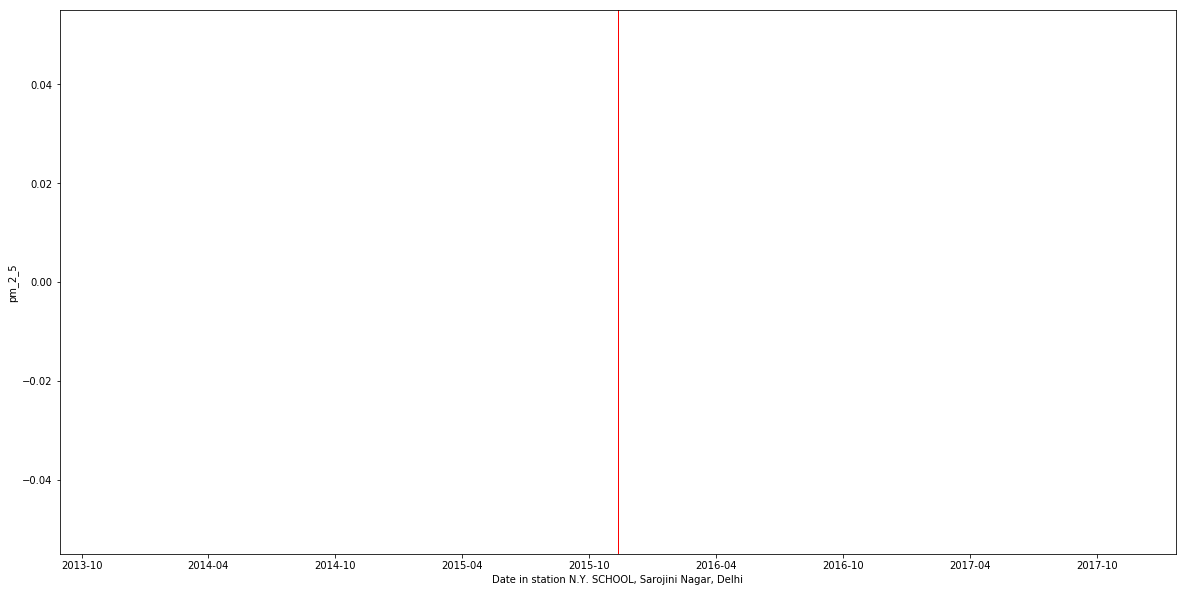

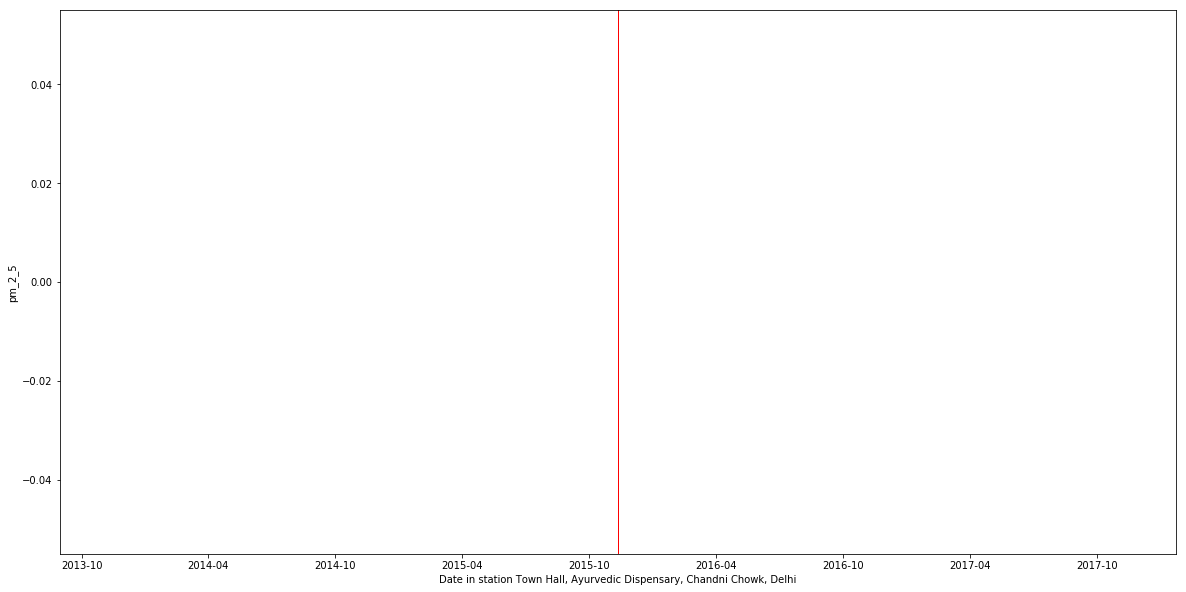

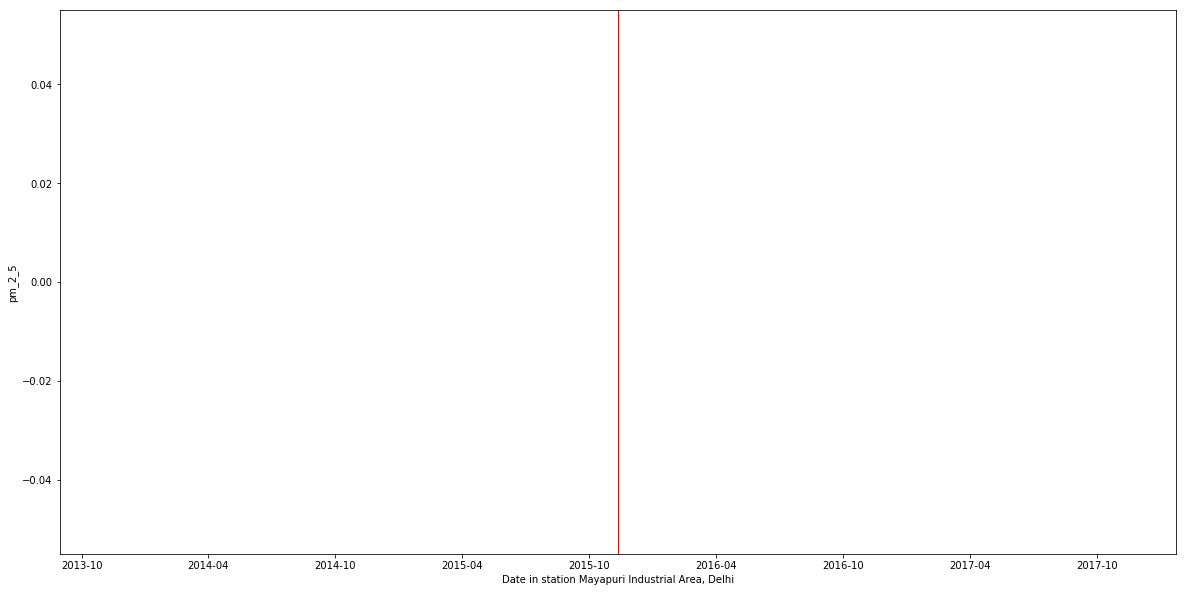

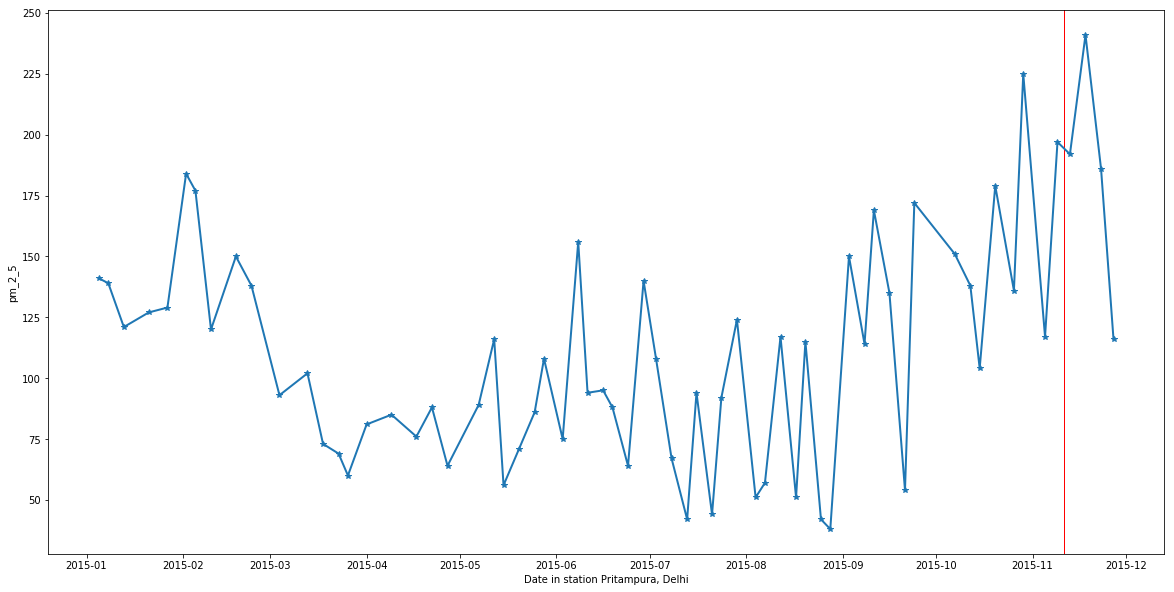

In [9]:
plot_all_data_different_plot(all_record_df, 'pm_2_5', diwali_date_string='11-11-15')

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


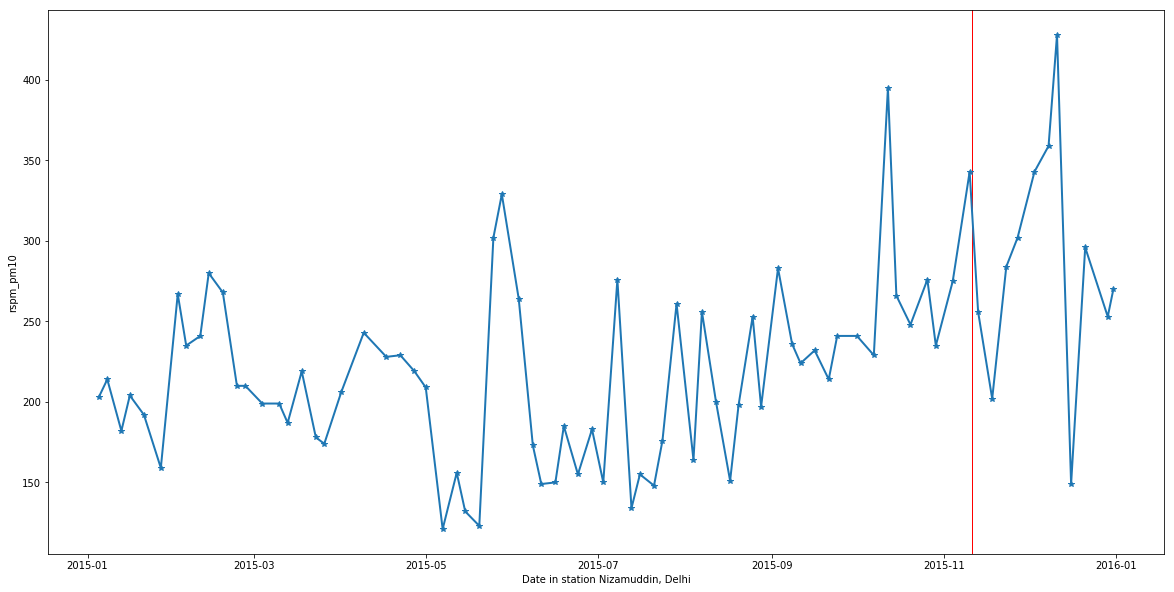

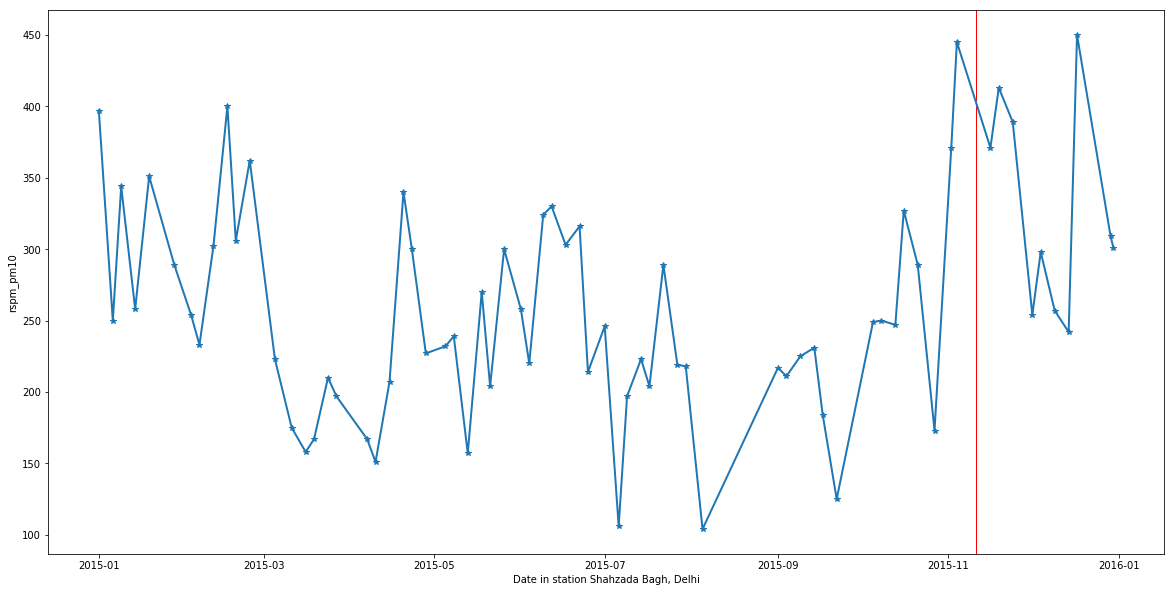

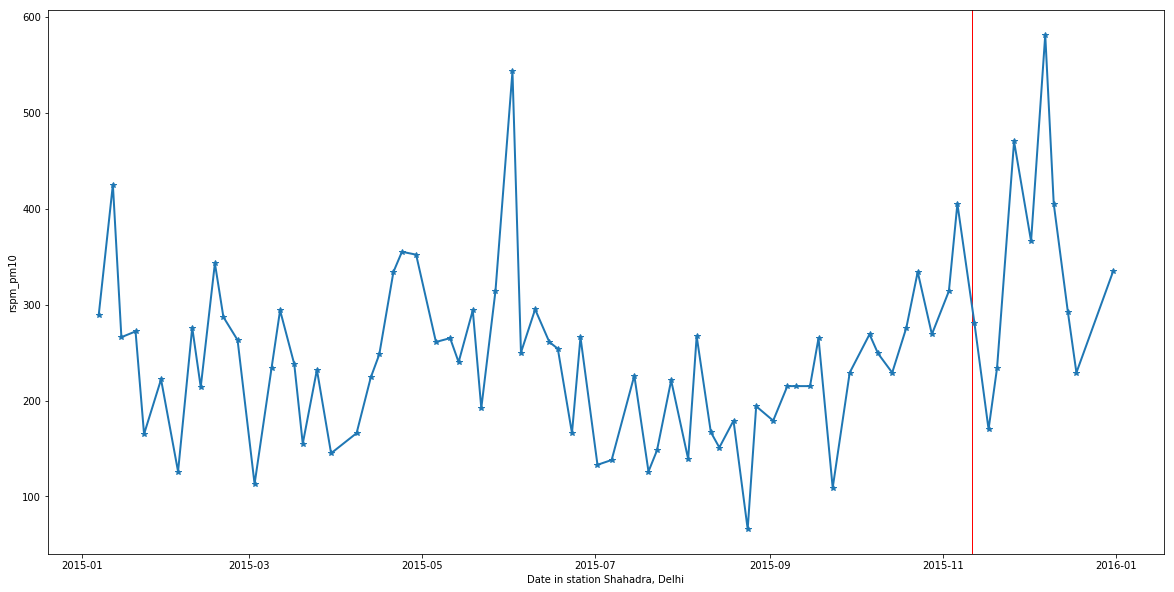

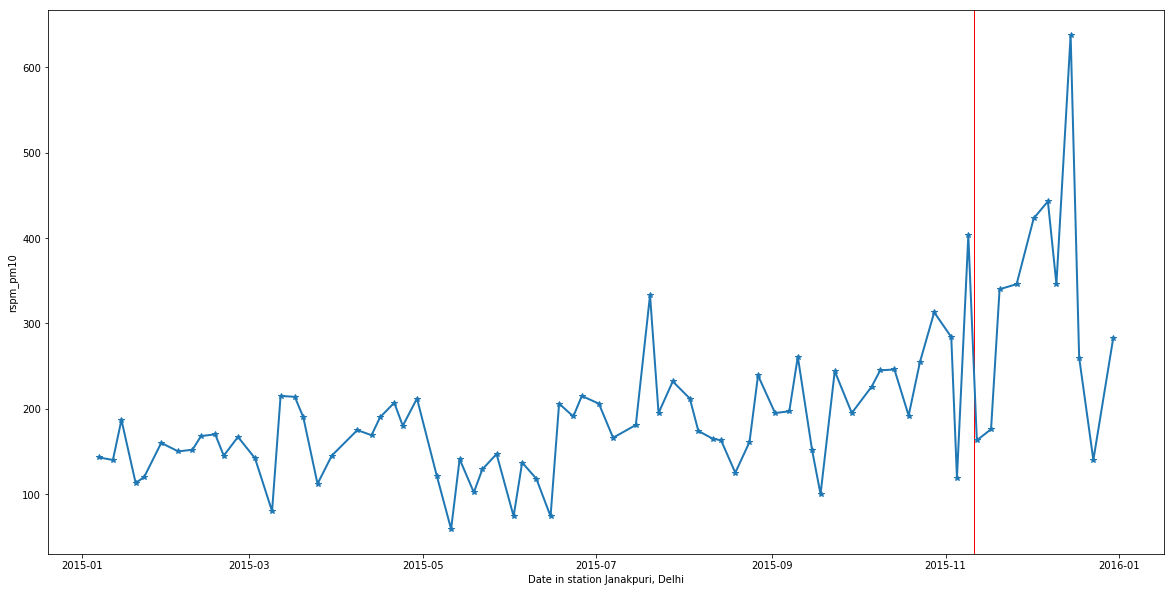

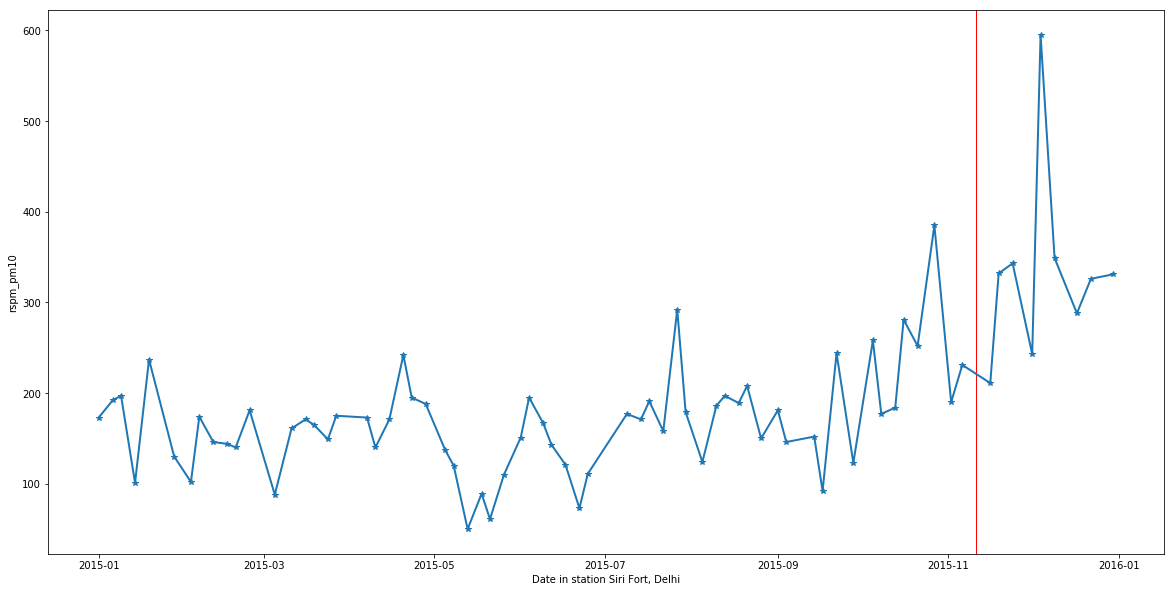

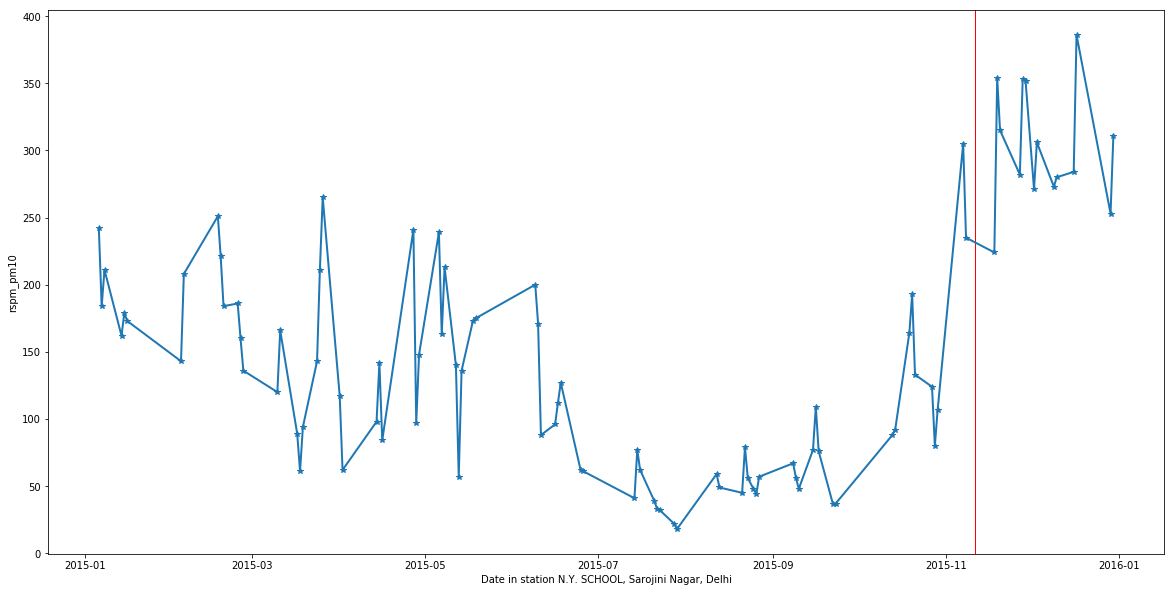

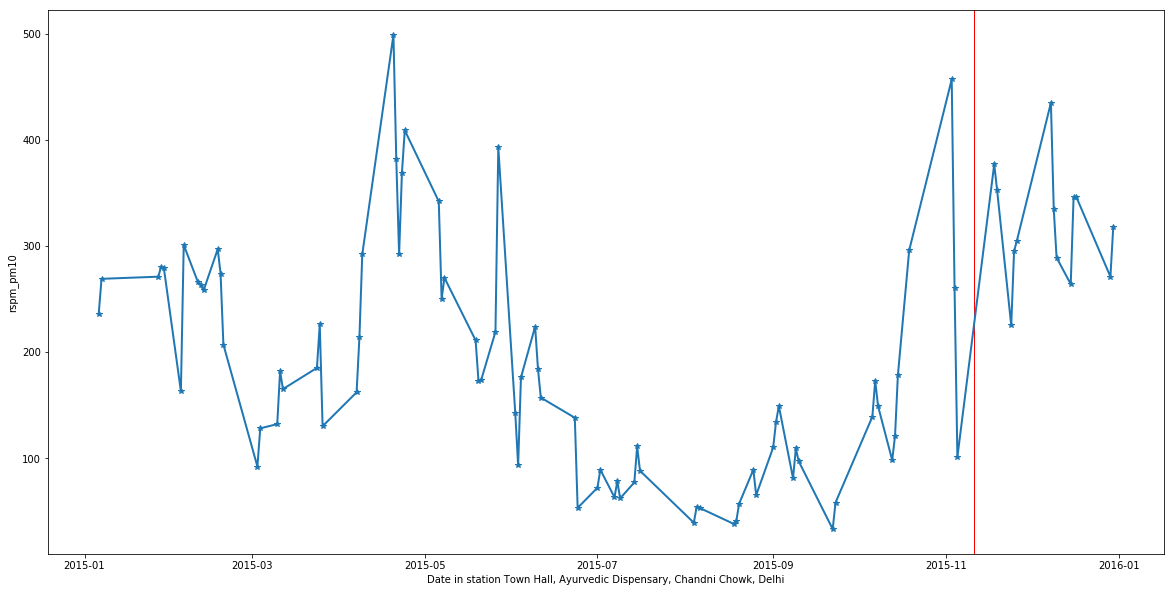

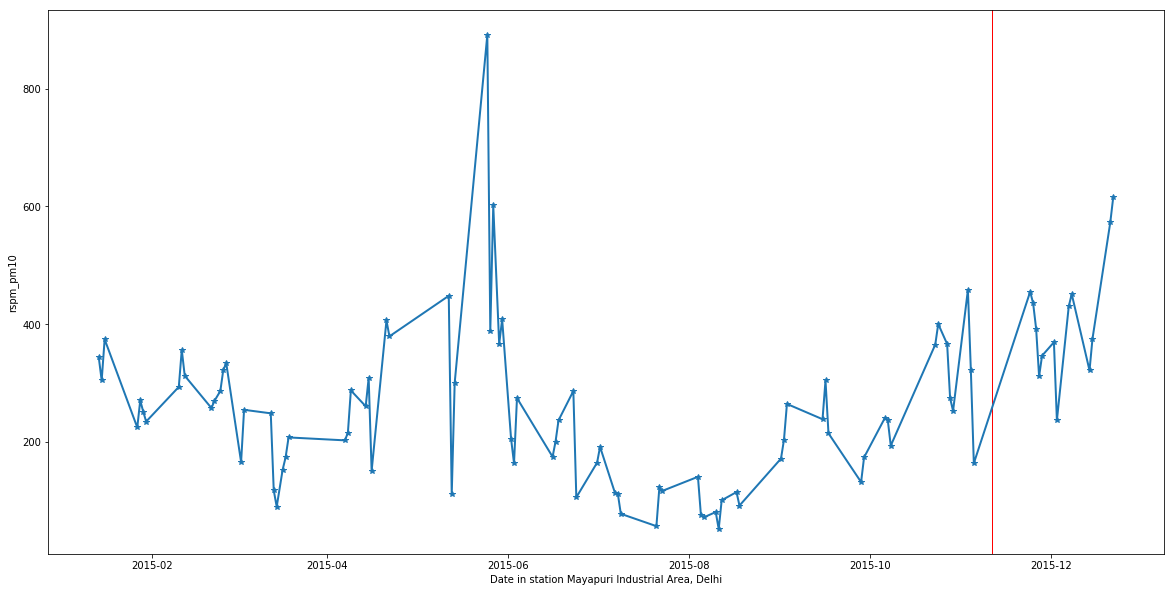

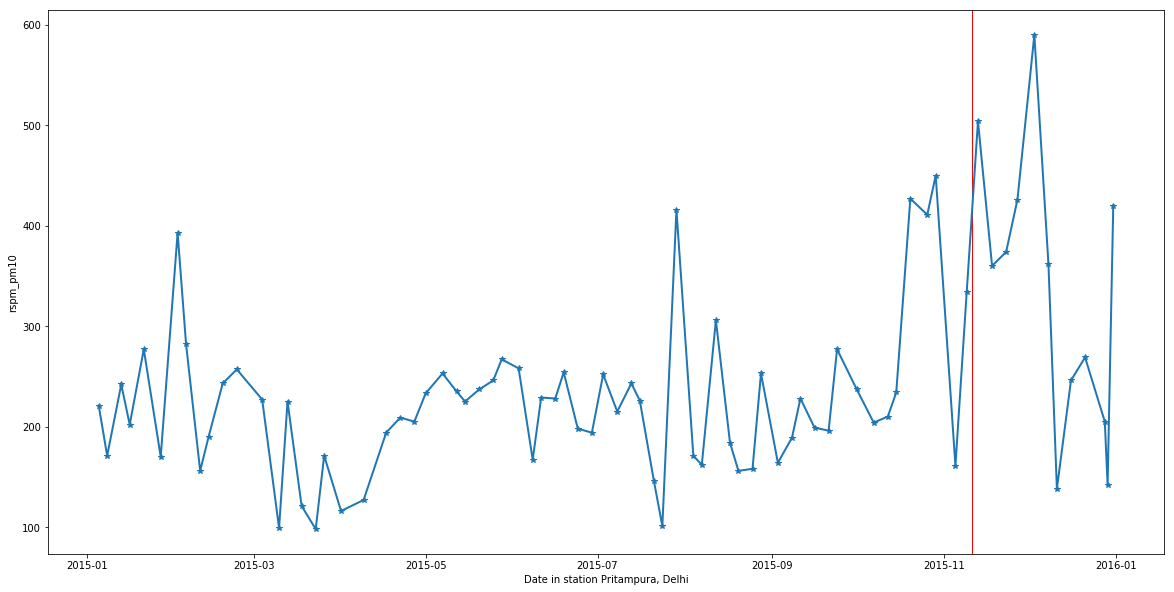

In [10]:
plot_all_data_different_plot(all_record_df, 'rspm_pm10', diwali_date_string='11-11-15')

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


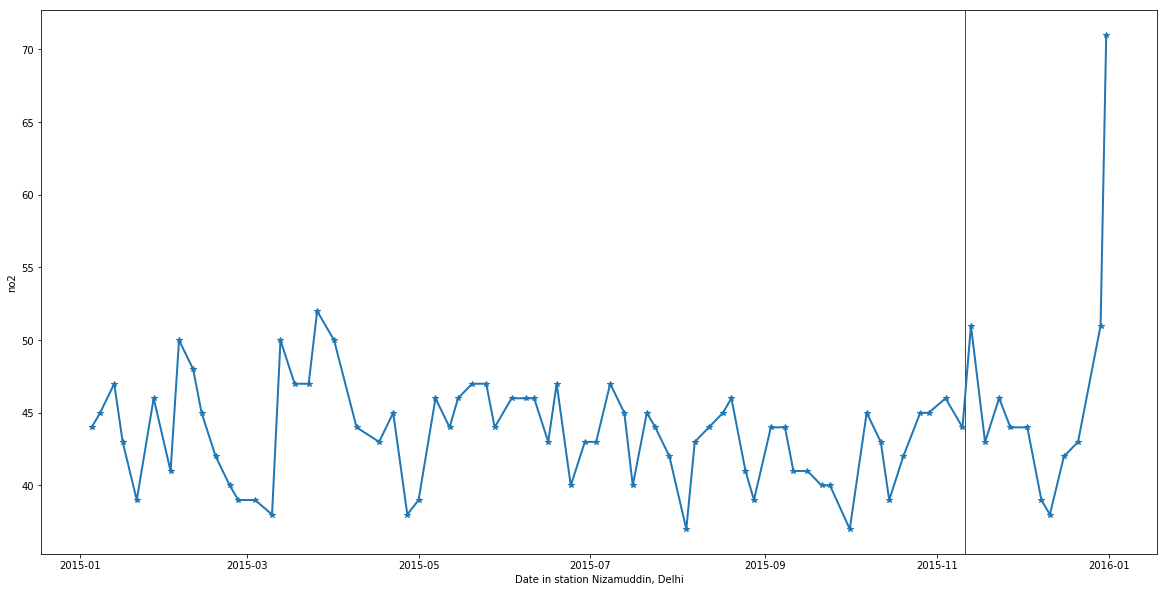

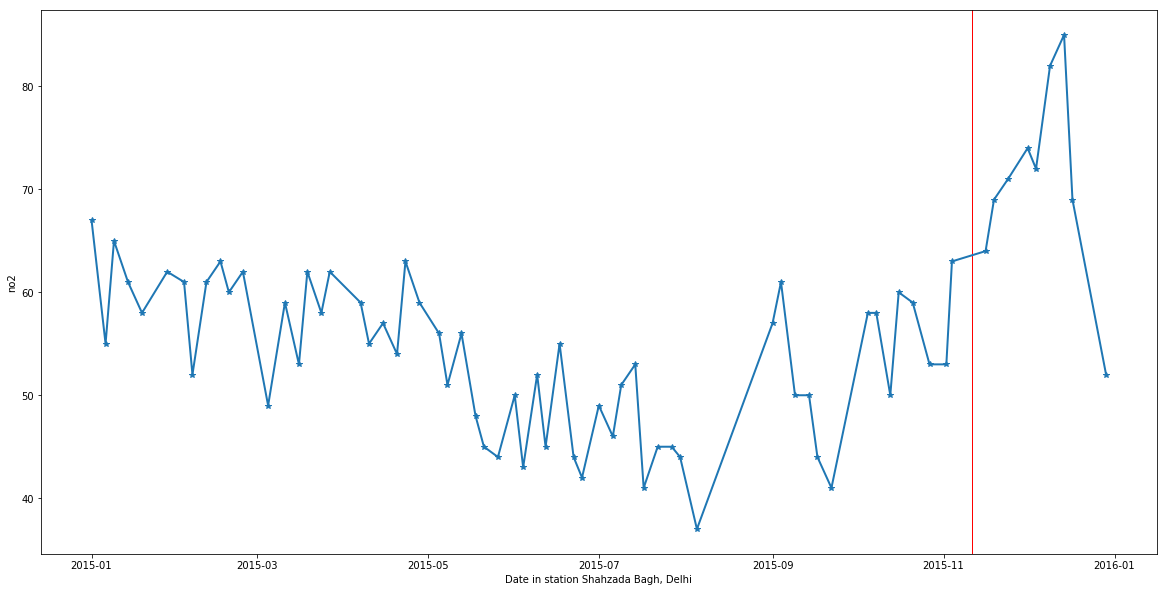

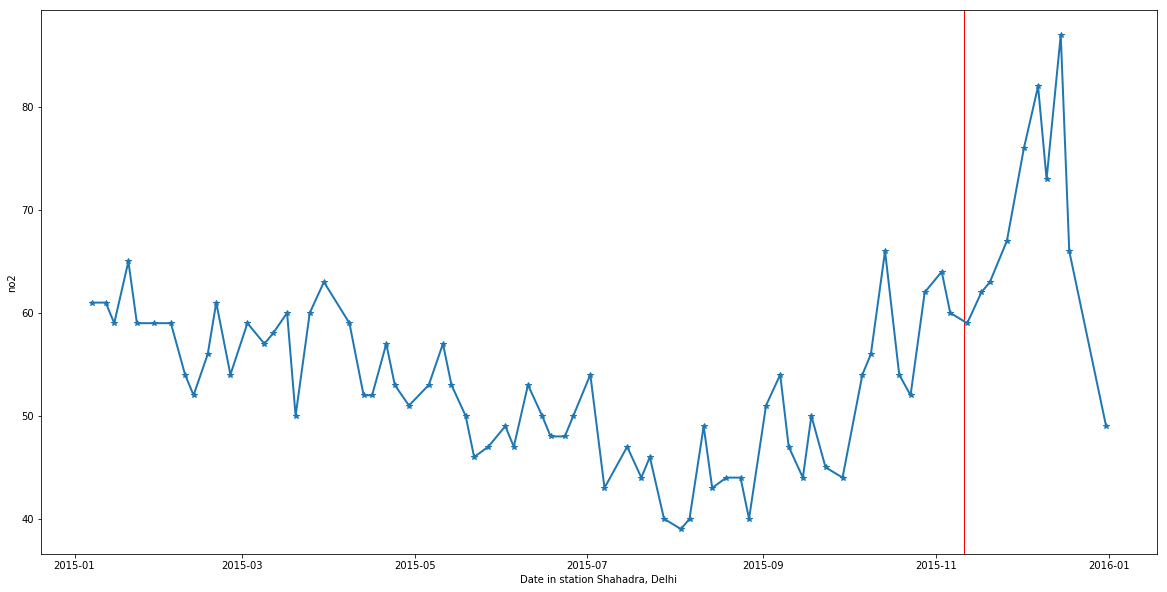

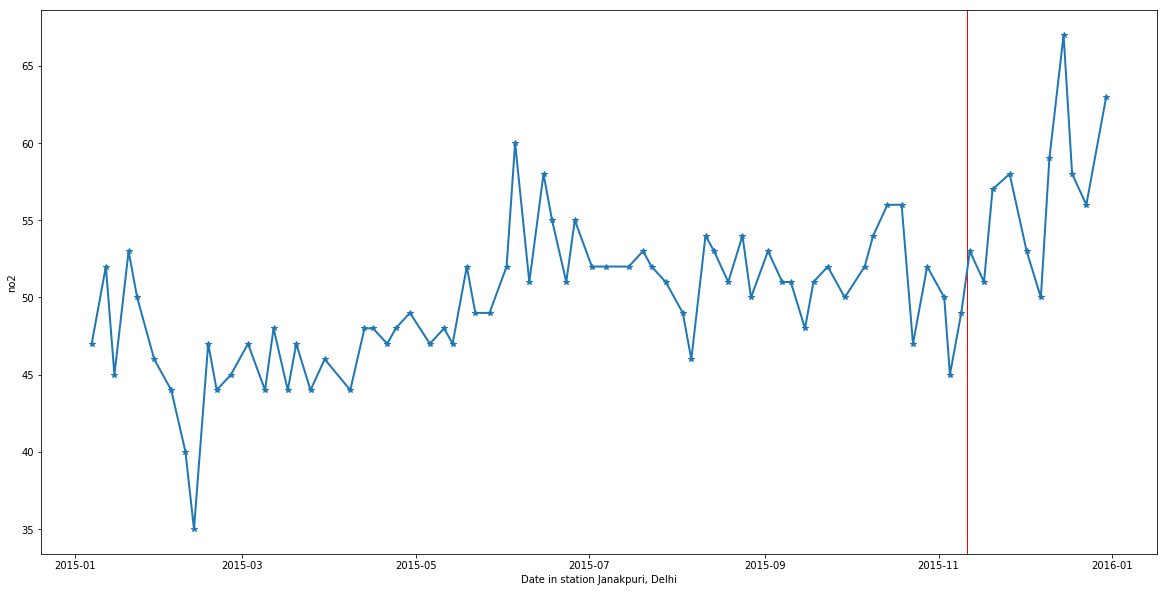

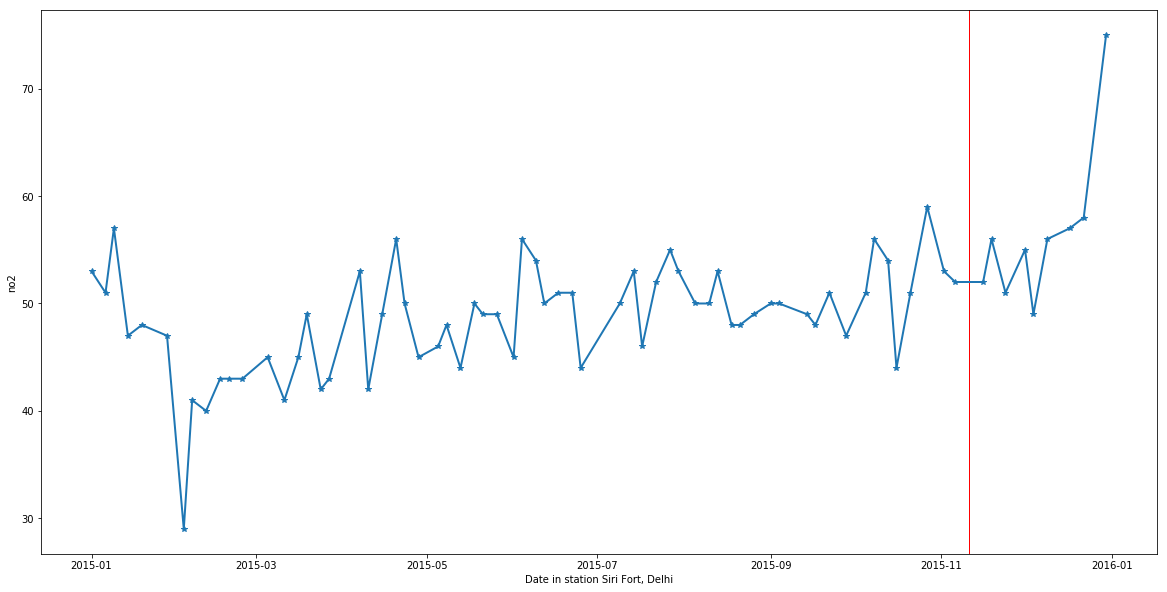

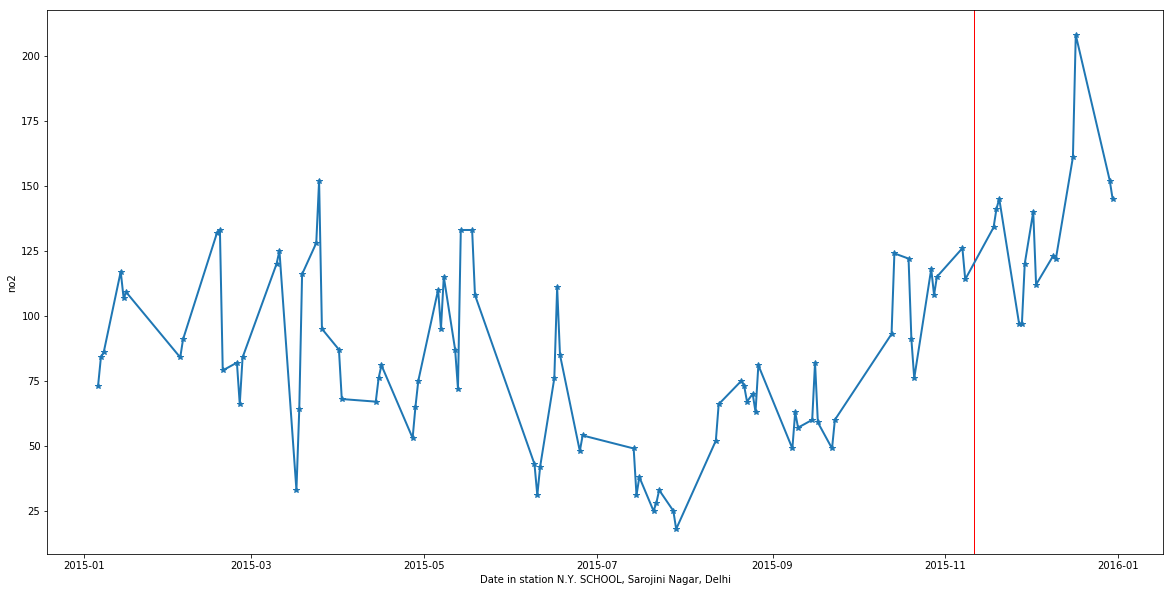

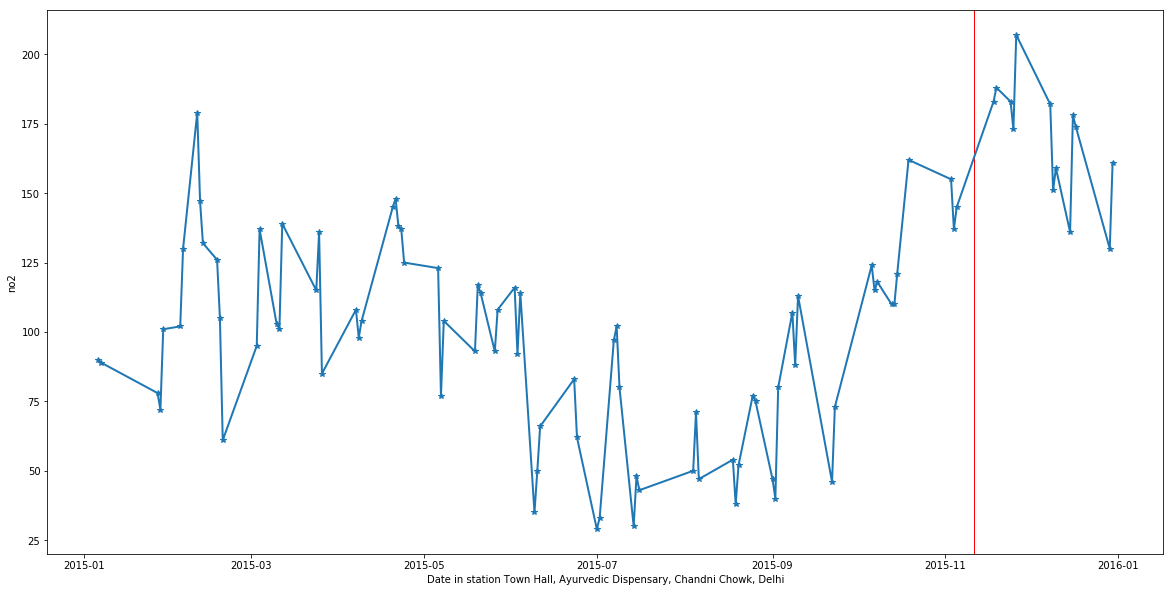

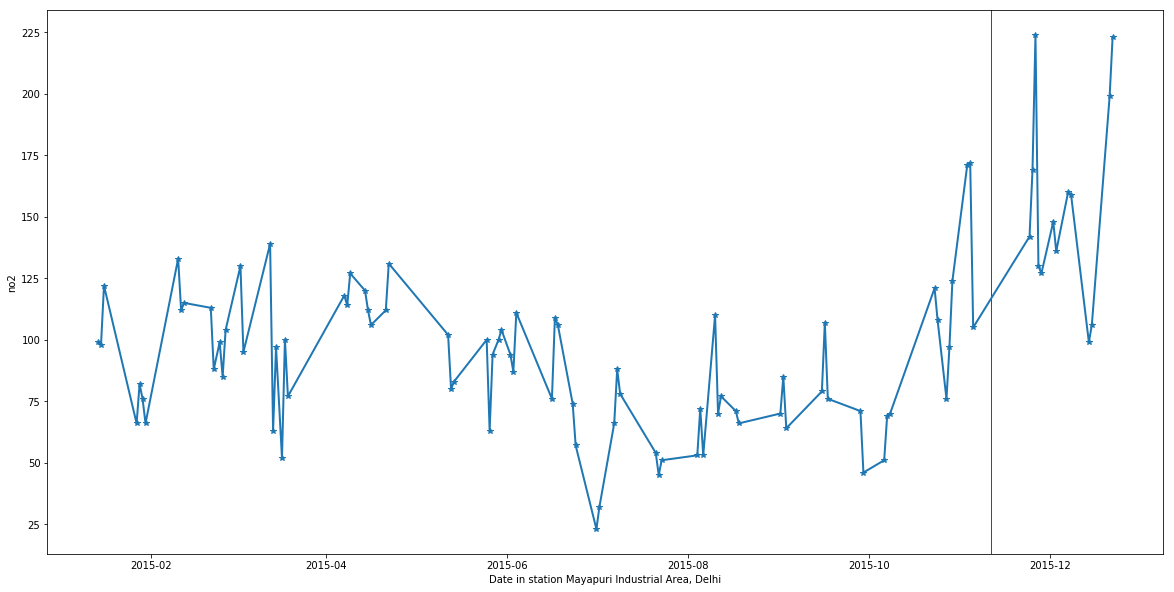

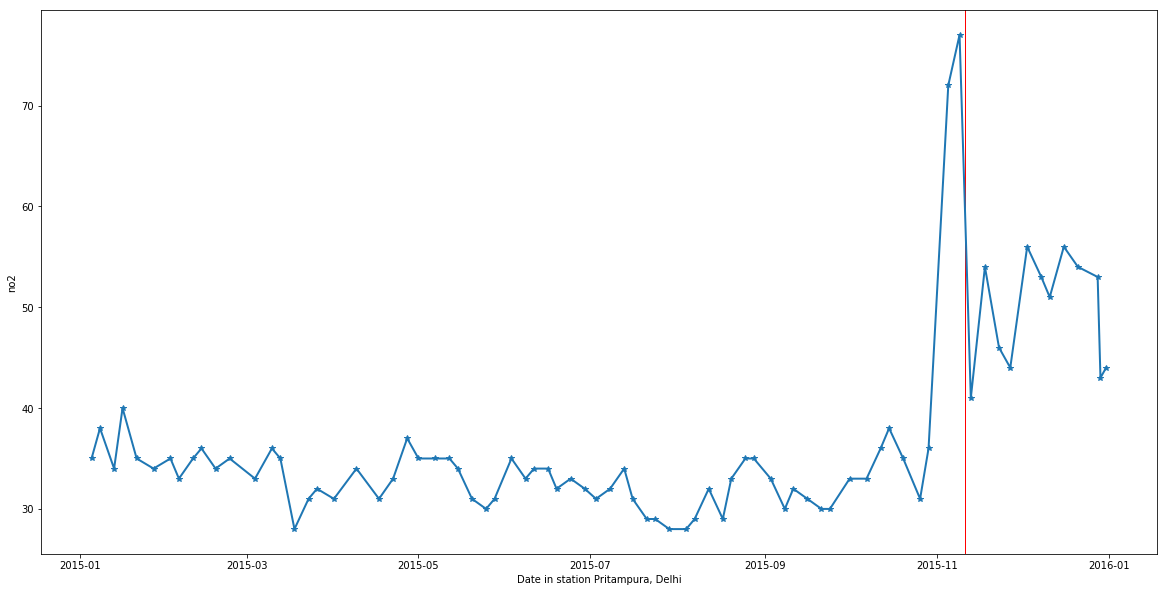

In [11]:
plot_all_data_different_plot(all_record_df, 'no2', diwali_date_string='11-11-15')

## All record dataframe

In [12]:
all_record_df

,agency,city_town_village_area,location_of_monitoring_station,no2,pm_2_5,rspm_pm10,sampling_date,so2,state,stn_code,type_of_location
0,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",44,NA,203,05-01-15,4,Delhi,55,"Residential, Rural and other Areas"
1,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",45,NA,214,08-01-15,4,Delhi,55,"Residential, Rural and other Areas"
2,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",47,NA,182,13-01-15,4,Delhi,55,"Residential, Rural and other Areas"
3,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",43,78,204,16-01-15,4,Delhi,55,"Residential, Rural and other Areas"
4,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",39,83,192,21-01-15,4,Delhi,55,"Residential, Rural and other Areas"
5,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",46,146,159,27-01-15,4,Delhi,55,"Residential, Rural and other Areas"
6,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",41,62,267,02-02-15,4,Delhi,55,"Residential, Rural and other Areas"
7,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",50,112,235,05-02-15,4,Delhi,55,"Residential, Rural and other Areas"
8,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",48,62,241,10-02-15,4,Delhi,55,"Residential, Rural and other Areas"
9,Central Pollution Control Board,Delhi,"Nizamuddin, Delhi",45,NA,280,13-02-15,4,Delhi,55,"Residential, Rural and other Areas"
